# Import Dataset

#### Dataset yang digunakan menggunakan dataset [animal Faces](https://www.kaggle.com/andrewmvd/animal-faces)
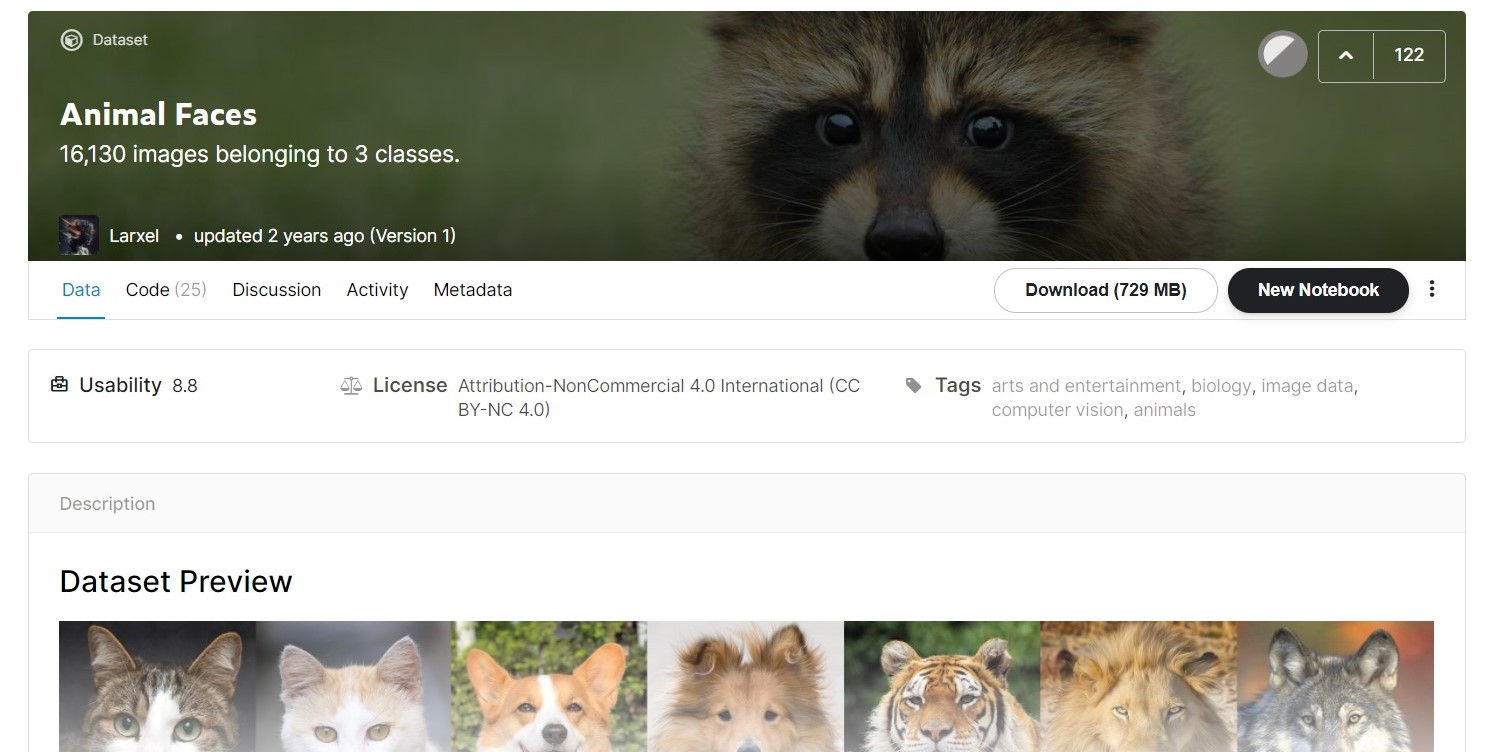


#### Untuk Link Resource Dataset Open Source [kaggle.com](www.kaggle.com)

### Cara Download Dataset Lewat Kaggle

In [11]:
#pip install -q kaggle
#from google.colab import files

#files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle
# !kaggle datasets download -d andrewmvd/animal-faces

### Cara download dataset atau File yang ada di google drive

In [12]:
!gdown --id 1Aed3aeCoIs-onDC26LGKXPes_o8pBkqA

Downloading...
From: https://drive.google.com/uc?id=1Aed3aeCoIs-onDC26LGKXPes_o8pBkqA
To: /content/archive.zip
100% 730M/730M [00:08<00:00, 89.7MB/s]


# Extract Dataset

In [13]:
# unzip
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

# Import Library

In [42]:
import os
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation and Splitting Data

In [32]:
base_dir='afhq'
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')


## Exploring the Animal Faces Data

In [35]:
import matplotlib.image as Image

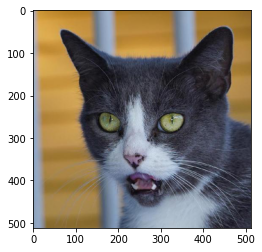

In [50]:
im='/content/afhq/train/cat/flickr_cat_000003.jpg'

gam=Image.imread(im)
plt.imshow(gam)

In [54]:
gam.shape

(512, 512, 3)

In [55]:
gam.min(),gam.max()

(0, 255)

In [53]:
gam

array([[[177, 172, 179],
        [178, 171, 178],
        [179, 170, 175],
        ...,
        [143, 102,  38],
        [143, 102,  38],
        [143, 102,  38]],

       [[177, 172, 179],
        [178, 171, 178],
        [179, 170, 175],
        ...,
        [143, 102,  38],
        [143, 102,  38],
        [143, 102,  38]],

       [[177, 172, 179],
        [178, 171, 178],
        [179, 170, 175],
        ...,
        [143, 102,  38],
        [143, 102,  38],
        [143, 102,  38]],

       ...,

       [[136, 156, 180],
        [138, 158, 182],
        [140, 160, 184],
        ...,
        [ 44,  46,  61],
        [ 48,  50,  65],
        [ 52,  54,  69]],

       [[136, 156, 180],
        [138, 158, 182],
        [140, 160, 184],
        ...,
        [ 46,  48,  63],
        [ 49,  51,  66],
        [ 53,  55,  70]],

       [[136, 156, 180],
        [138, 158, 182],
        [140, 160, 184],
        ...,
        [ 49,  51,  66],
        [ 52,  54,  69],
        [ 55,  57,  72]]

In [33]:
os.listdir(train_dir)

['dog', 'cat', 'wild']

In [34]:
os.listdir(val_dir)

['dog', 'cat', 'wild']

In [25]:
train_wild_dir = os.path.join(train_dir,"wild")
train_cat_dir = os.path.join(train_dir,"cat")
train_dog_dir = os.path.join(train_dir,"dog")

validat_paper_dir = os.path.join(val_dir,"wild")
validat_scissors_dir = os.path.join(val_dir,"Cat")
validat_rock_dir = os.path.join(val_dir,"dog")

# Data Augmentation

In [26]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    validation_split=0.2, #Membagi Data Validasi sebanyak 20%
    rescale=1./255, #Normalisasikan Data
    shear_range=0.2, #specifies the angle of the slant in degrees
    zoom_range=0.2, #Randomly rotate image
    horizontal_flip=True) # randomly flip images horizontally
train_gene=datagen.flow_from_directory(
    train_dir, #direktori data training
    subset='training', #subset data training
    target_size=(224,224), #input target 224x224
    batch_size=32, #batch size yang akan masuk ke gpu/tpu 32
    color_mode='rgb', #color mode Red, Green, Blue
    class_mode='categorical', #menggunakan class categorical
    shuffle=True, #mix up data 
    seed=42,) #rand
val_gene=datagen.flow_from_directory(
    val_dir, #direktori data validasi
    subset='validation', #subset data validasi
    target_size=(224,224),#input target 224x224
    batch_size=32,#batch size yang akan masuk ke gpu/tpu 32
    color_mode='rgb',#color mode Red, Green, Blue
    class_mode='categorical', #menggunakan class categorical
    shuffle=True,
    seed=42,#mix up data 
    )



Found 11706 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# display all images that have been augmented

Found 11706 images belonging to 3 classes.


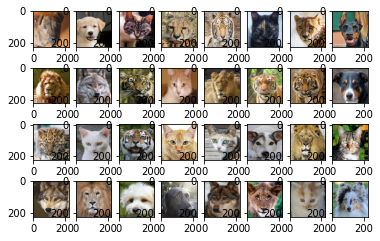

In [27]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
train_datagen = datagen.flow_from_directory(
    train_dir,
    subset='training',
    target_size=(224,224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42,)

x, y = train_datagen.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

# Creating Model Convolutional Neural Network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)), #Convolutional Layers with 32 Filters Matrix 3D
      tf.keras.layers.MaxPool2D(2,2),# Pooling Layer with Maximum array to Matrix 2D
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'), #Convolutional Layers with 64 Filters
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'), #Convolutional Layers with 128 Filters
      tf.keras.layers.MaxPool2D(2,2), 
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'), #Convolutional Layers with 128 Filters
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(), #Flatten layers which multidimensional to 1 Dimensional Array
      tf.keras.layers.Dropout(0.5), #Randomly discard unused neurons

      tf.keras.layers.Dense(512,activation='relu'), #Hidden Layers Fully Connected Layers
      tf.keras.layers.Dense(3,activation='softmax') # use 3 output and activation softmax
                                                    #for for more than 2 classes
  
])

# Summarizing the Model

In [ ]:
model.summary() #summary the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

# Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy', #use loss function for categorical
              optimizer=tf.keras.optimizers.Adam(lr=3e-4), #use Adaptive Momentum for Optimzer
              metrics=['accuracy']) #use accuracy metrics

C:\Users\ismil\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Creating Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cb=[EarlyStopping(monitor='loss',mode='min',patience=5,restore_best_weights=True)] #use callbacks that other code is expected to call back the arguments at a certain time.

# Training the Model

In [ ]:
history=model.fit(
    train_gene,
    steps_per_epoch=25, #step in one epochs
    epochs=40, #how much training
    validation_data=val_gene,
    verbose=1,
    callbacks=[cb])

Epoch 1/40
25/25 [==============================] - 13s 447ms/step - loss: 1.1301 - accuracy: 0.3837 - val_loss: 1.0765 - val_accuracy: 0.3400
Epoch 2/40
25/25 [==============================] - 10s 420ms/step - loss: 1.0076 - accuracy: 0.5025 - val_loss: 0.9184 - val_accuracy: 0.5133
Epoch 3/40
25/25 [==============================] - 11s 437ms/step - loss: 0.7368 - accuracy: 0.6812 - val_loss: 0.7939 - val_accuracy: 0.6633
Epoch 4/40
25/25 [==============================] - 11s 424ms/step - loss: 0.5689 - accuracy: 0.7638 - val_loss: 0.5171 - val_accuracy: 0.7800
Epoch 5/40
25/25 [==============================] - 11s 424ms/step - loss: 0.4333 - accuracy: 0.8625 - val_loss: 0.4395 - val_accuracy: 0.8200
Epoch 6/40
25/25 [==============================] - 11s 424ms/step - loss: 0.3876 - accuracy: 0.8587 - val_loss: 0.3786 - val_accuracy: 0.8567
Epoch 7/40
25/25 [==============================] - 11s 439ms/step - loss: 0.3248 - accuracy: 0.8850 - val_loss: 0.3377 - val_accuracy: 0.8567

# Show the Result

In [ ]:
import matplotlib.pyplot as plt


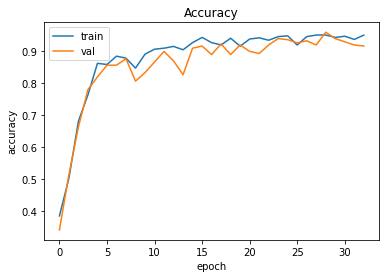

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


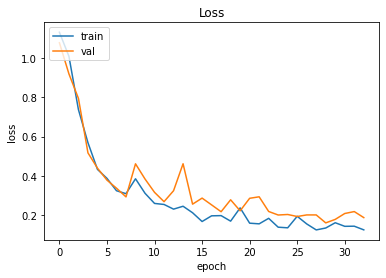

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Saving the Model

In [ ]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x000001CD90881100>>

In [ ]:
from keras.models import load_model

In [ ]:
history.model.save('my_model.h5')

### Convertion to Tensorflow Lite

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with tf.io.gfile.GFile('model.tflite','wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ismil\AppData\Local\Temp\tmpmcjrw6k5\assets


INFO:tensorflow:Assets written to: C:\Users\ismil\AppData\Local\Temp\tmpmcjrw6k5\assets


In [ ]:
!ls -la | grep 'model'


'ls' is not recognized as an internal or external command,
operable program or batch file.


### Save Weight

In [ ]:
model.save_weights('my_weight.h5')

In [9]:
!gdown --id 1rLto5VO9obh1nYM7AZINZWcK5QkwCJF5
!gdown --id 1DWPuVl5zIIgWYHOQFeFMAdQT9Ss_53Id

Downloading...
From: https://drive.google.com/uc?id=1rLto5VO9obh1nYM7AZINZWcK5QkwCJF5
To: /content/my_model.h5
100% 116M/116M [00:00<00:00, 225MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1DWPuVl5zIIgWYHOQFeFMAdQT9Ss_53Id
To: /content/my_weight.h5
100% 38.7M/38.7M [00:00<00:00, 83.2MB/s]


# Loading the Model


In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

### Check Model saving

In [29]:
model3=load_model('my_model.h5')
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

# Making Predictions

Saving 60436a28b258b.jpg to 60436a28b258b (1).jpg
60436a28b258b.jpg
[[1. 0. 0.]]
cat


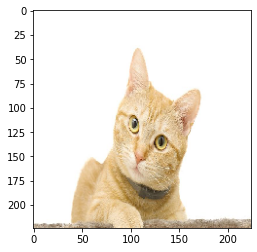

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=32)
  print(fn)

  class_lables = list(train_gene.class_indices.keys())

  print(classes)
  class_indice = 0
  for i in range(len(classes[0])):
      if classes[0][i] > classes[0][0]:
          class_indice = i
  test_class = class_lables[class_indice]
  print(test_class)

# The End

#Want to ask questions and discuss with me?

### can with social media :
### My Instagram : [@fahlevialir](https://www.instagram.com/fahlevialir/)
### My linkedin : [Mukhammad Fahlevi Ali Rafsanjani](https://www.linkedin.com/in/fahlevialir/)

## Resource Learning (Sumber Belajar): Python, Machine Learning, Data Science

##[Google Machine Learning](https://developers.google.com/machine-learning/crash-course?hl=id)
##[Coursera Machine Learning](https://www.coursera.org/search?query=machine%20learning&)
##[w33School Python](https://www.w3schools.com/python/)